## Regressão Logística

Dado o modelo de regressão logística, como ajustamos θ (coeficientes ou pesos) para ele? Vamos dotar nosso modelo de classificação com um conjunto de suposições probabilísticas e, em seguida, ajustar os parâmetros via máxima verossimilhança. Isto poder ser escrito como:

$$ p(y | x;θ) = (y_{\text{pred}}(x))^y (1 - y_{\text{pred}}(x))^{1-y} $$

Assumindo que:

$$ P(y = 1 | x; y_{\text{pred}}(x)) = y_{\text{pred}}(x) $$

$$ P(y = 0 | x; y_{\text{pred}}(x)) = 1 - y_{\text{pred}}(x) $$

Para maximização da verossimilhança pode-se utilizar a descida do gradiente a fim realizar a atualização dos pesos ou coeficientes, semelhante ao caso da regressão linear:

$$ \theta_j := \theta_j + \alpha \left( y^{(i)} - y_{\text{pred}}(x^{(i)}) \right) x_j^{(i)} $$

Função perda ou função de custo para regressão logística:

$$\operatorname{L(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left( y^{(i)} \log(y_{\text{pred}}^{(i)}) + (1 - y^{(i)}) \log(1 - y_{\text{pred}}^{(i)}) \right)}$$


## Atividade 1

>**Implemente uma classe que corresponda a Regressão Logistica que retorne a classificação após finalizar o critério de convergência (número de iterações)**

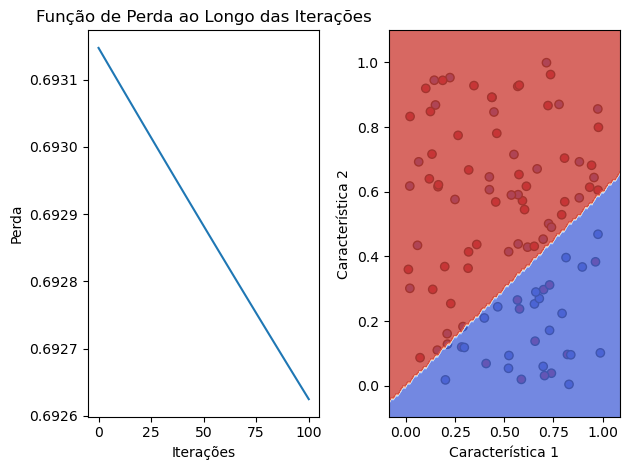

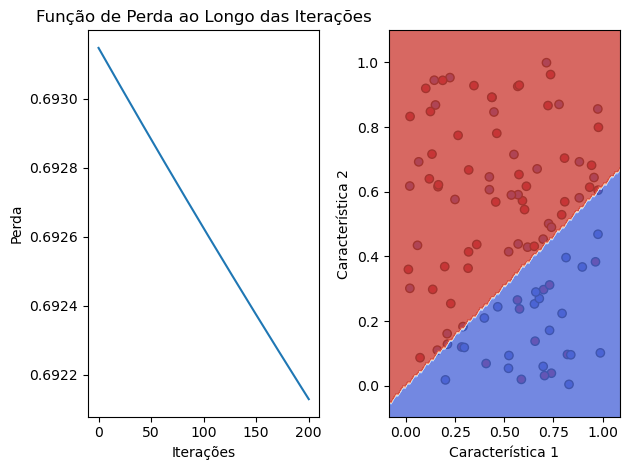

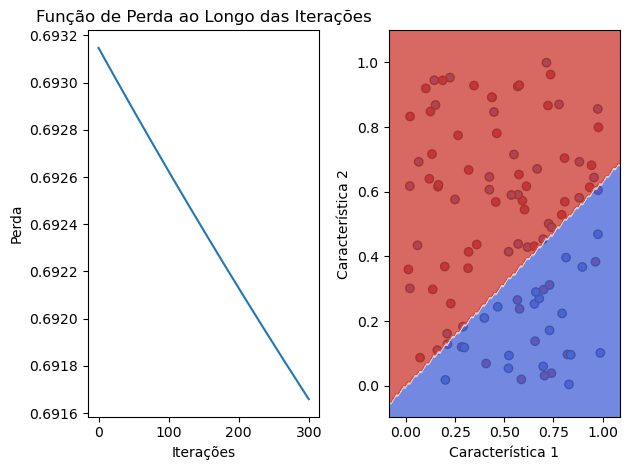

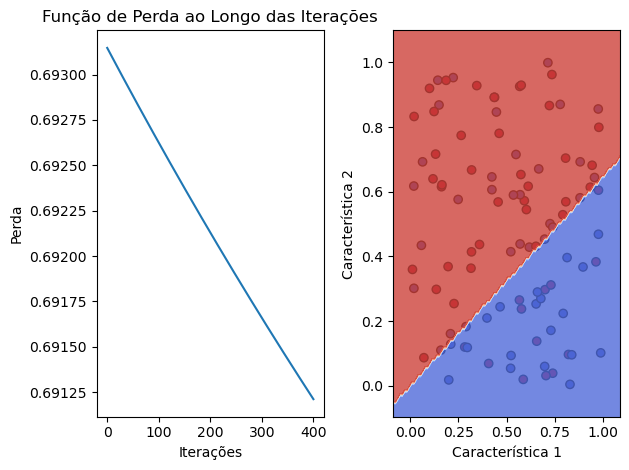

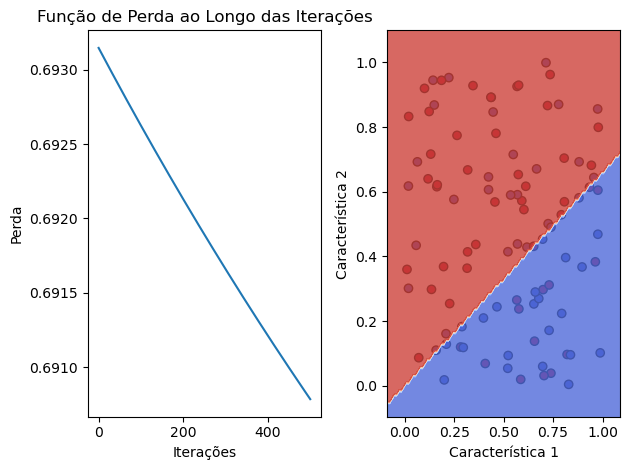

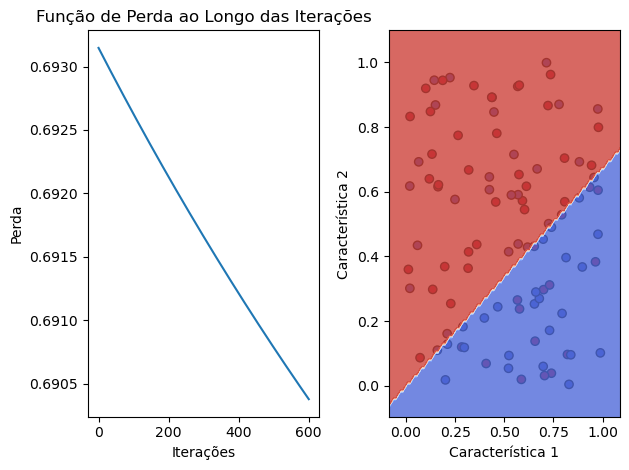

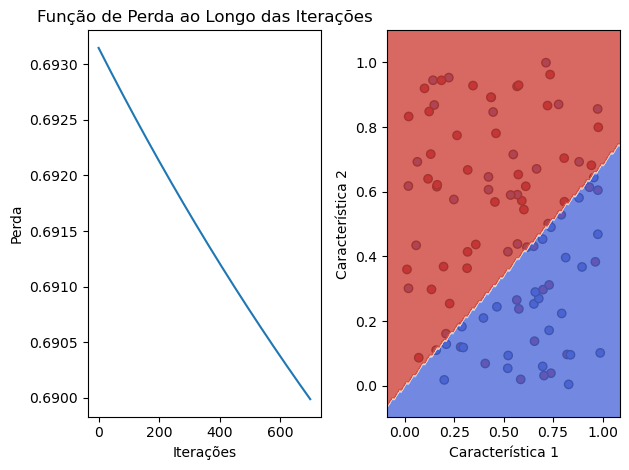

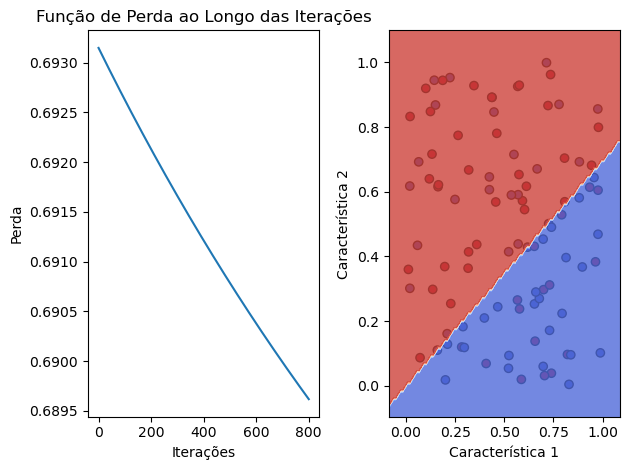

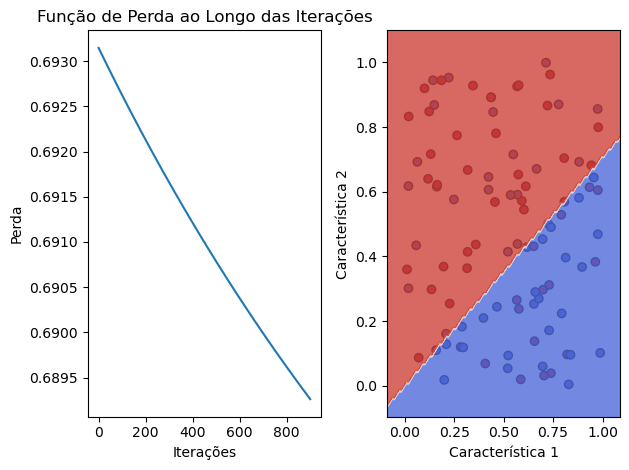

In [5]:
import numpy as np
import matplotlib.pyplot as plt


class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):

        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iterations):

            z = np.dot(X, self.theta)
            h = self.sigmoid(z)

            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.learning_rate * gradient
            loss = self.loss(h, y)
            self.loss_history.append(loss)

            if i > 0 and i % 100 == 0:
                self.plot_loss_and_decision_boundary(X, y)

    def predict(self, X):
        return np.round(self.sigmoid(np.dot(X, self.theta)))

    def plot_loss_and_decision_boundary(self, X, y):
        plt.clf()

        # Plotar gráfico da função de perda
        plt.subplot(1, 2, 1)
        plt.plot(range(len(self.loss_history)), self.loss_history)
        plt.title('Função de Perda ao Longo das Iterações')
        plt.xlabel('Iterações')
        plt.ylabel('Perda')

        # Plotar fronteira de decisão
        plt.subplot(1, 2, 2)
        if X.shape[1] == 2:
            plt.scatter(X[:, 0], X[:, 1], c=y,
                        cmap=plt.cm.coolwarm, edgecolors='k')
            x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
            x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
            xx1, xx2 = np.meshgrid(np.linspace(
                x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
            Z = self.predict(np.c_[xx1.ravel(), xx2.ravel()])
            Z = Z.reshape(xx1.shape)
            plt.contourf(xx1, xx2, Z, alpha=0.8, cmap=plt.cm.coolwarm)
            plt.xlim(xx1.min(), xx1.max())
            plt.ylim(xx2.min(), xx2.max())
            plt.xlabel('Característica 1')
            plt.ylabel('Característica 2')
        else:
            # Se houver mais de duas características, não podemos plotar a fronteira de decisão
            plt.text(0.5, 0.5, 'Não é possível plotar a fronteira de decisão\ncom mais de duas características',
                     horizontalalignment='center', verticalalignment='center', fontsize=12)
            plt.axis('off')

        plt.tight_layout()
        plt.pause(0.1)


# Gerar dados de exemplo com 2 características ou mais (preferencialmente com 2, pois o gráfico será dinâmico)
np.random.seed(0)
X_train = np.random.rand(100, 2)
y_train = np.random.randint(2, size=100)

# Treinar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

plt.show()

## **Atividade 2 - Regressão com o dataset Breast cancer**

Features: Total de 30

Para essa atividade utilizar as features:
1. Mean radius
2. Mean texture

Variável dependente: Presença de câncer de mama maligno ou benigno
1. 0:  Indica que o tumor é maligno (câncer de mama maligno).
2. 1: Indica que o tumor é benigno (câncer de mama benigno).


>**Treine os dados da base breast cancer utilizando a Regressão Logistica implementada**

>**Faça as predições nos dados de teste e compare os dados reais com os preditos**

>>Obs: Variar a número de iterações da Regressão Logistica

>>Obs2: usar `test_size = 0.2` e `random_state = 42` na divisão do dataset

In [6]:
from sklearn import datasets
import pandas as pd

data = datasets.load_breast_cancer()
colunas = ['Mean radius', 'Mean texture']
pd.DataFrame(data['data'][:, :2], columns=colunas)

Mean radius  Mean texture
0          17.99         10.38
1          20.57         17.77
2          19.69         21.25
3          11.42         20.38
4          20.29         14.34
..           ...           ...
564        21.56         22.39
565        20.13         28.25
566        16.60         28.08
567        20.60         29.33
568         7.76         24.54

[569 rows x 2 columns]

## Resposta  normalizando os dados:

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score
from sklearn.preprocessing import StandardScaler

data = datasets.load_breast_cancer()
X = data['data'][:, :2]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

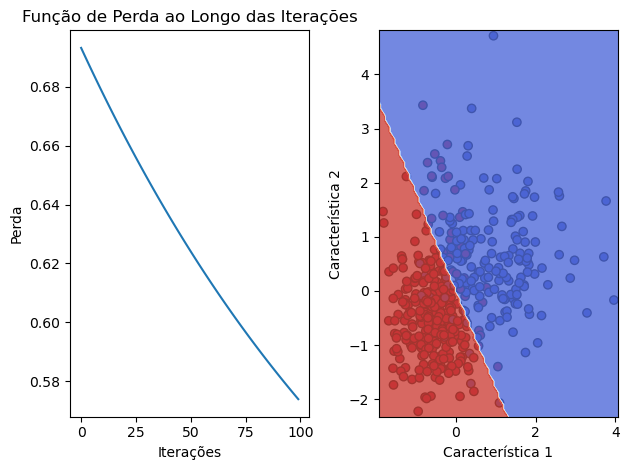

Métricas de Avaliação com 100 iterações:

 Acurácia: 89.47%
 Precisão: 96.83%


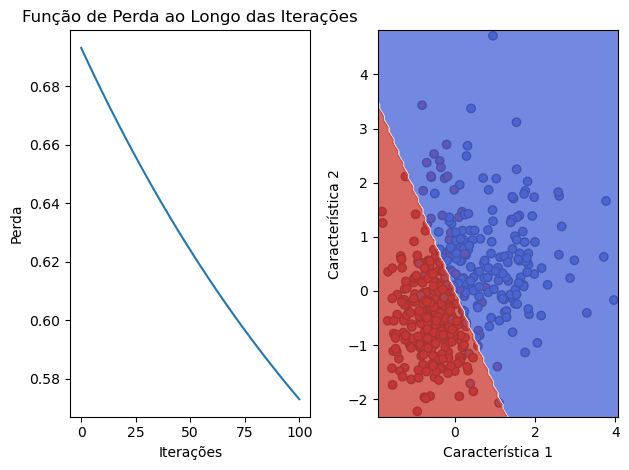

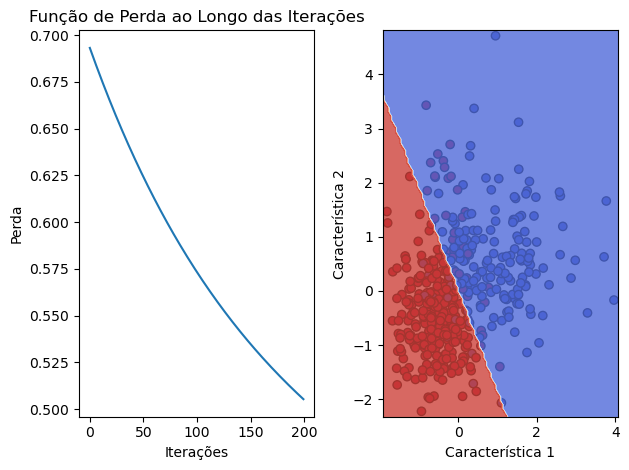

Métricas de Avaliação com 200 iterações:

 Acurácia: 90.35%
 Precisão: 96.88%


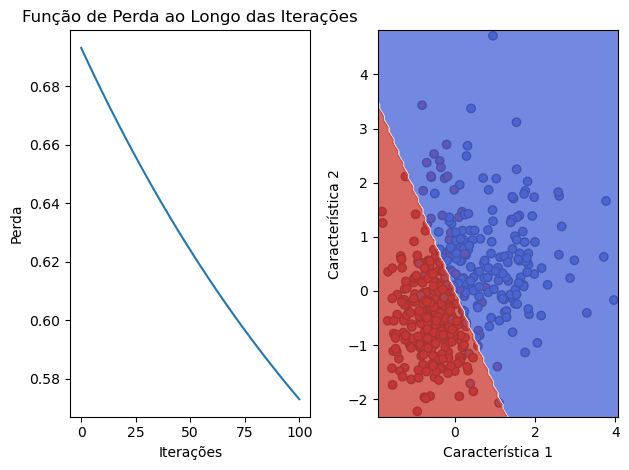

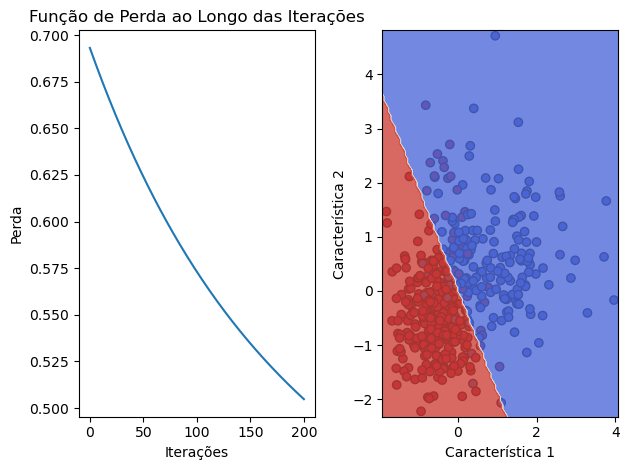

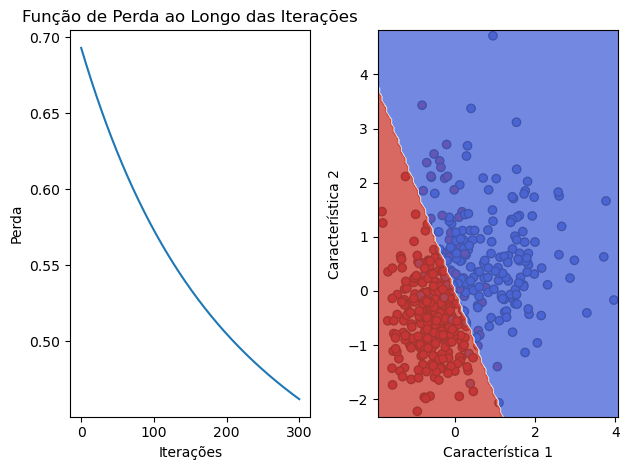

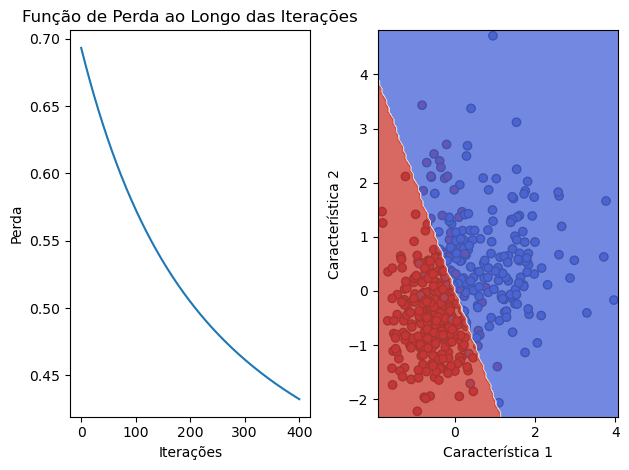

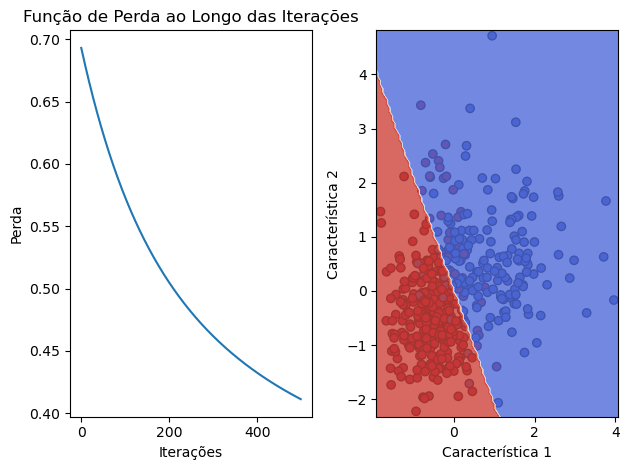

Métricas de Avaliação com 500 iterações:

 Acurácia: 90.35%
 Precisão: 96.88%


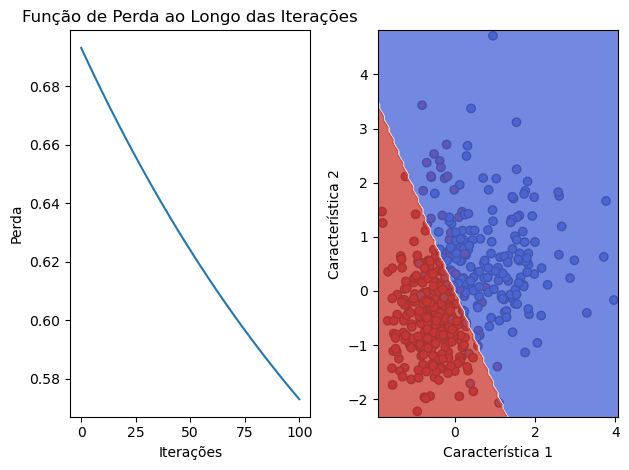

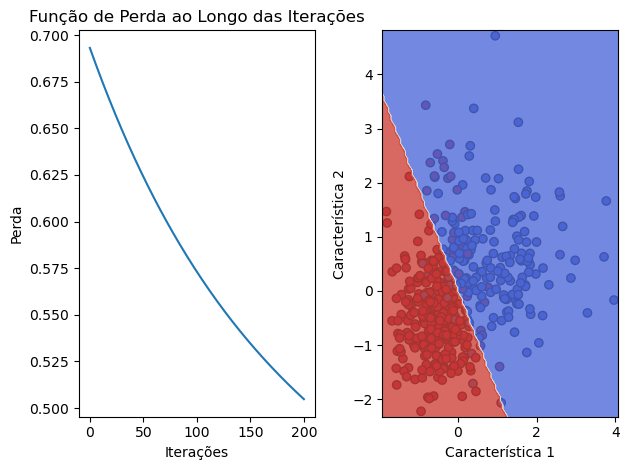

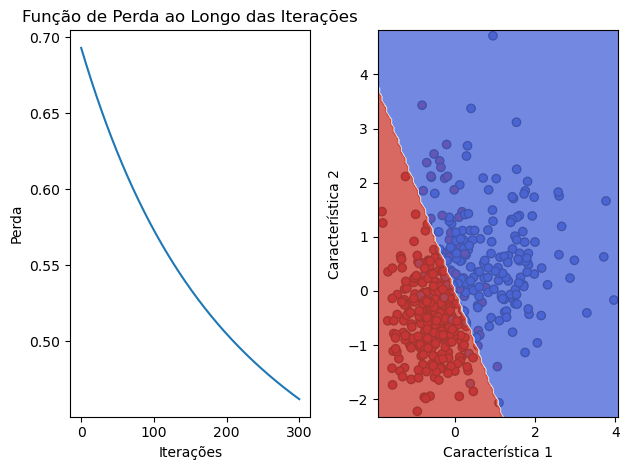

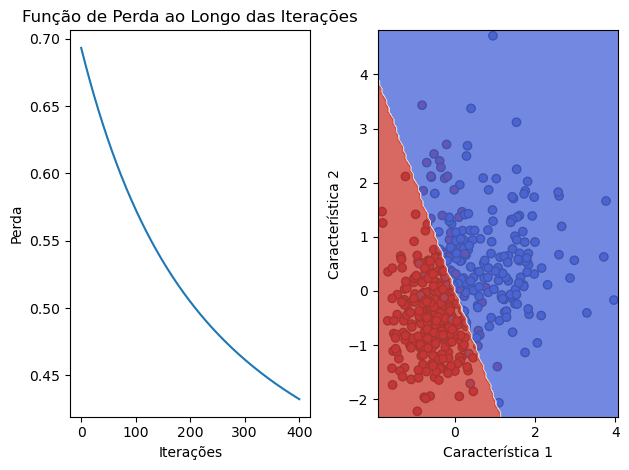

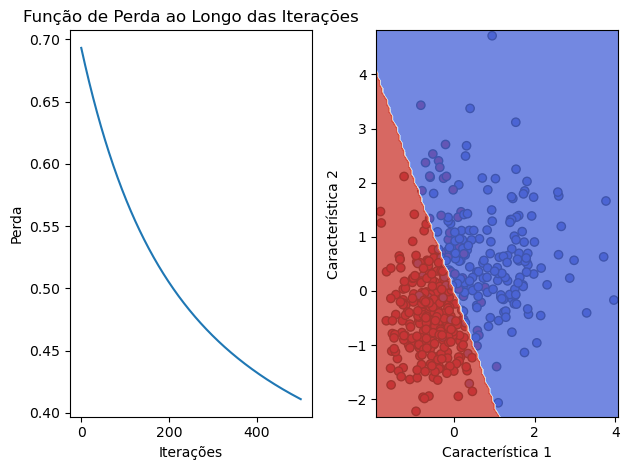

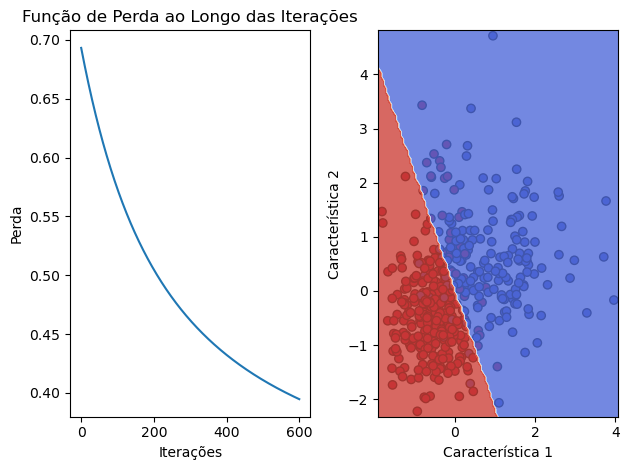

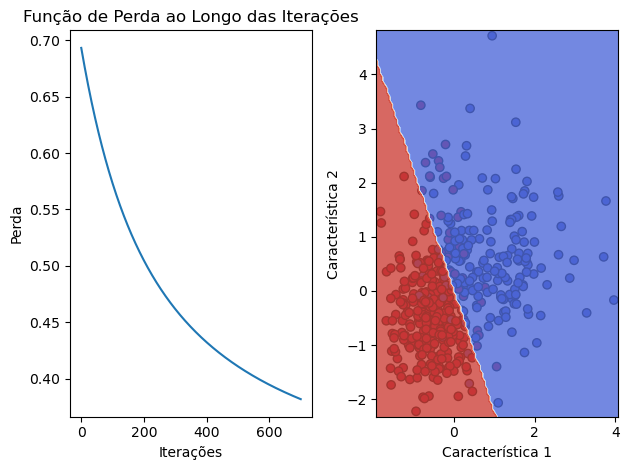

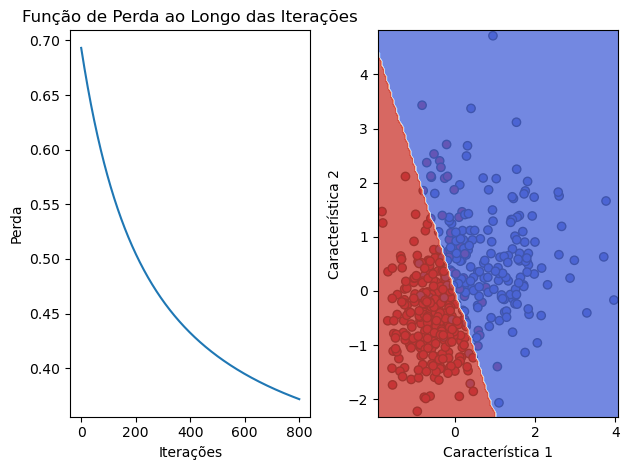

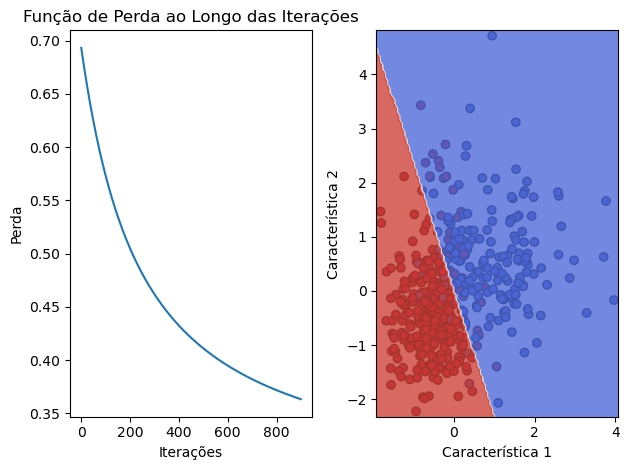

Métricas de Avaliação com 900 iterações:

 Acurácia: 88.60%
 Precisão: 95.31%


In [8]:
num_iterations = [100, 200, 500, 900]

for iterations in num_iterations:
    model = LogisticRegression(num_iterations=iterations)
    model.fit(X_train_scaled, y_train)

# Prever
    y_pred = model.predict(X_test_scaled)

# Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

# Plotar
    model.plot_loss_and_decision_boundary(X_train_scaled, y_train)
    print(f"Métricas de Avaliação com {iterations} iterações:\n")
    print(f" Acurácia: {accuracy*100:.2f}%\n Precisão: {precision*100:.2f}%")

## Resposta sem normalizar os dados:

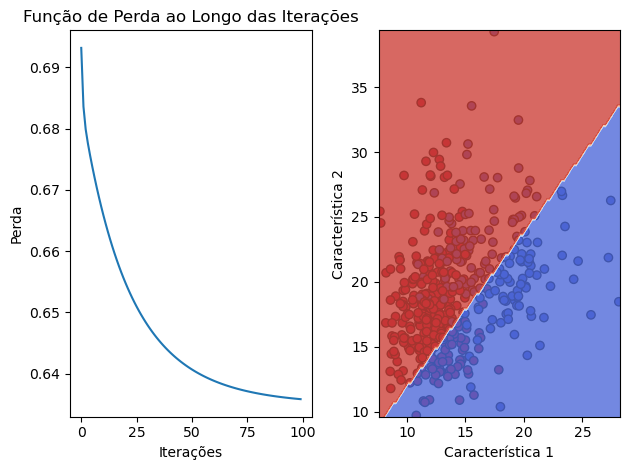

Métricas de Avaliação com 100 iterações:

 Acurácia: 64.91%
 Precisão: 69.14%


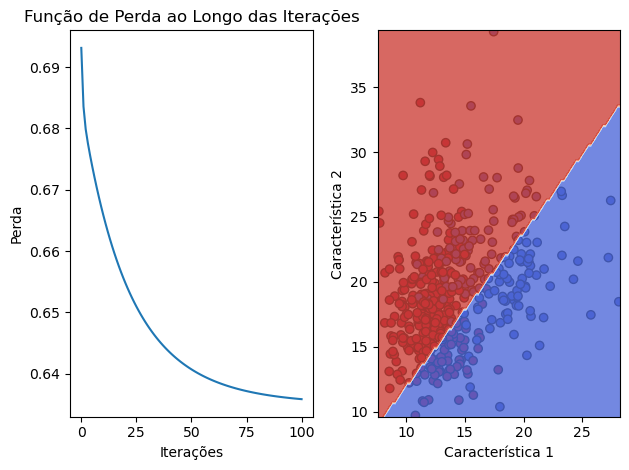

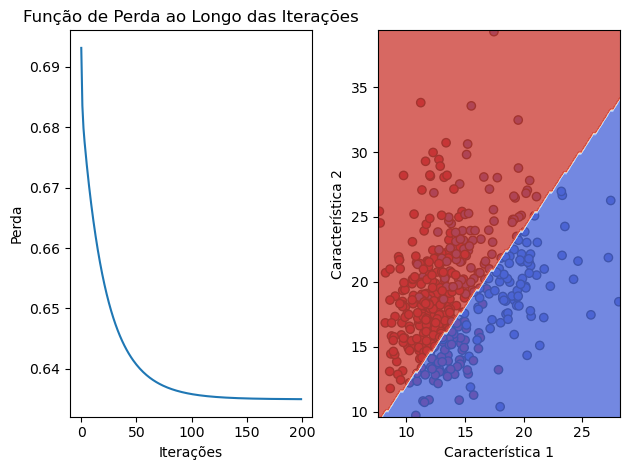

Métricas de Avaliação com 200 iterações:

 Acurácia: 62.28%
 Precisão: 67.95%


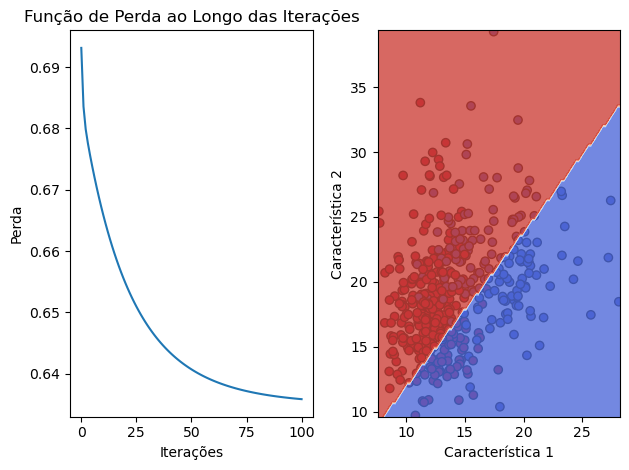

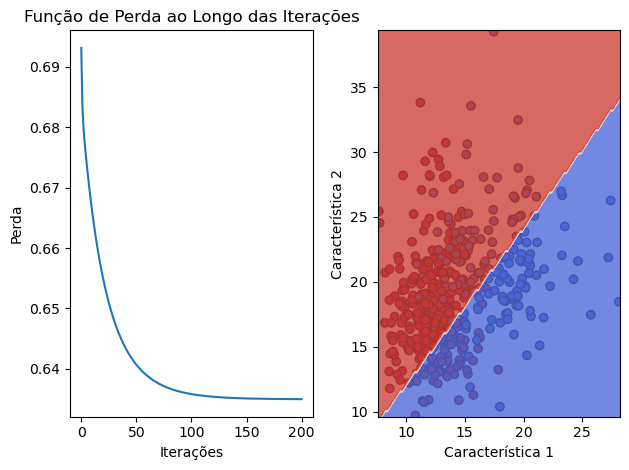

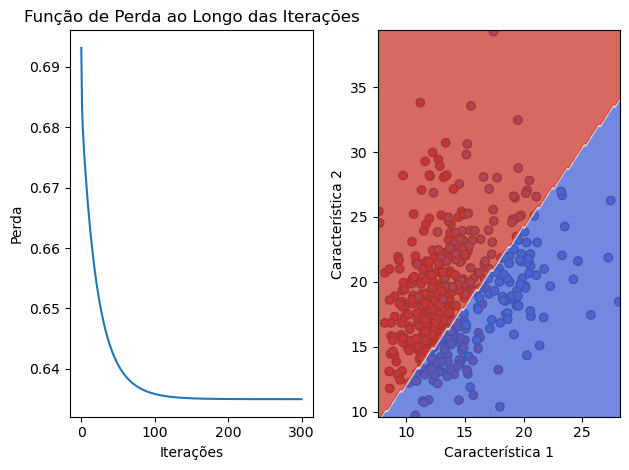

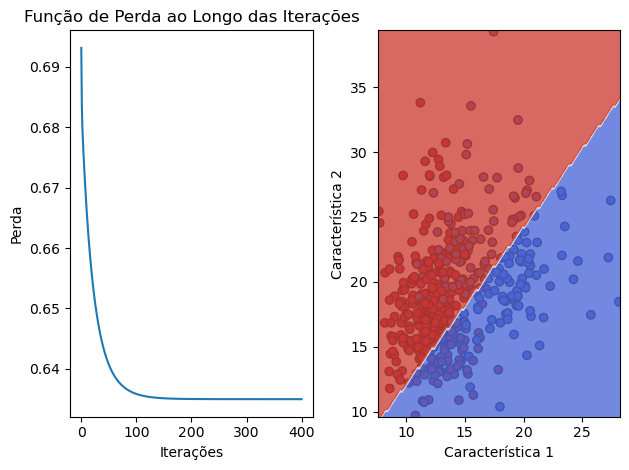

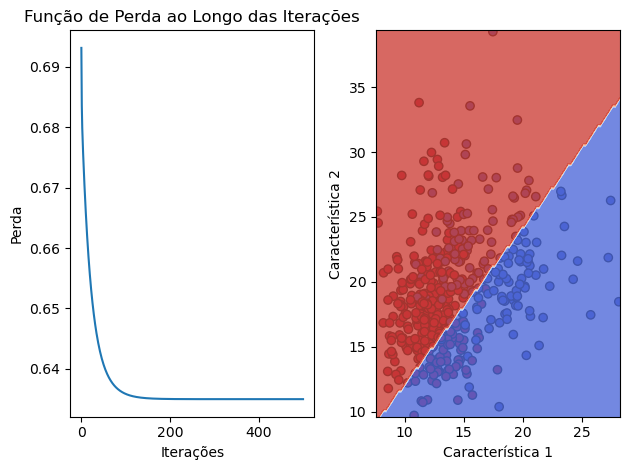

Métricas de Avaliação com 500 iterações:

 Acurácia: 62.28%
 Precisão: 67.95%


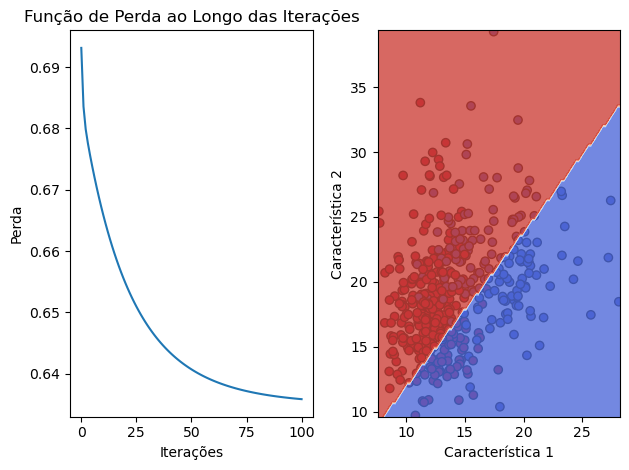

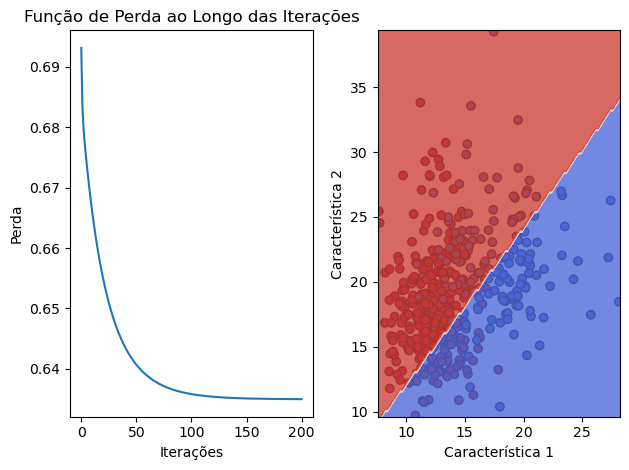

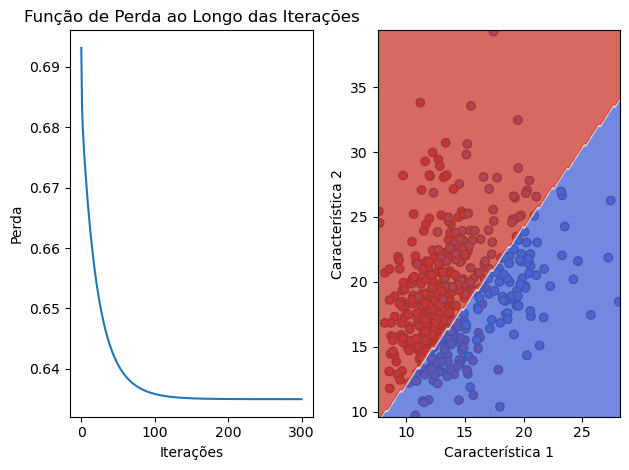

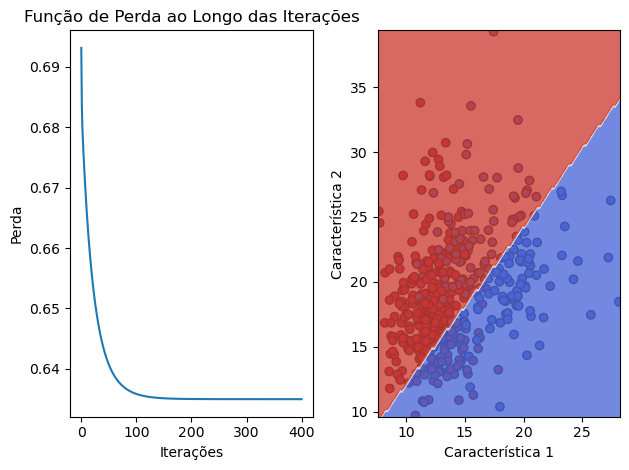

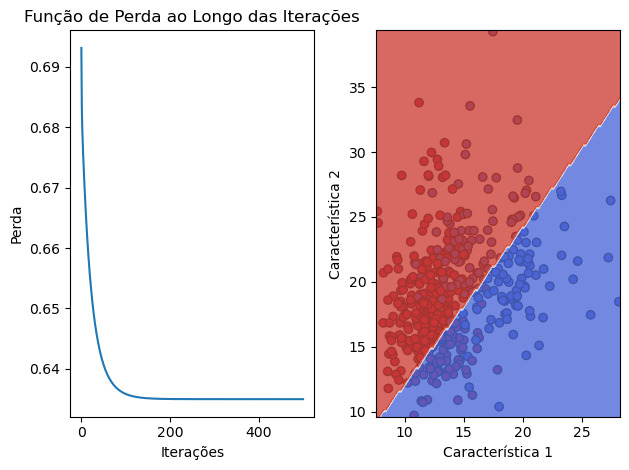

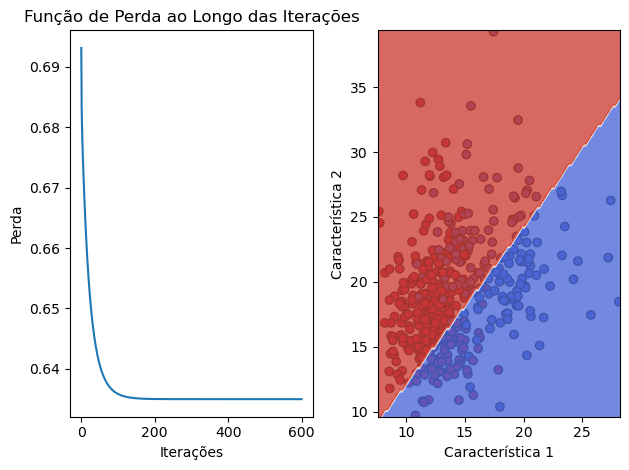

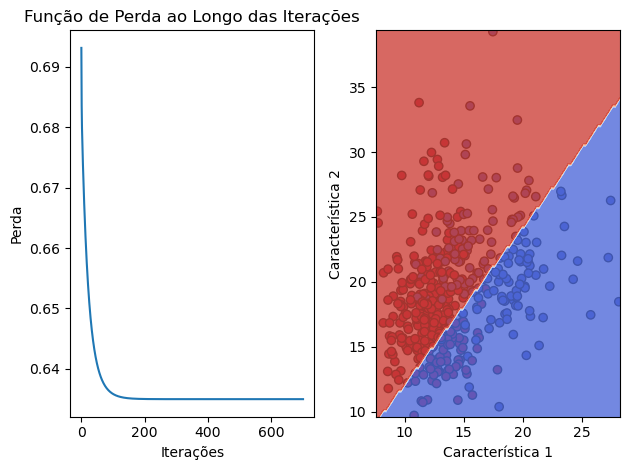

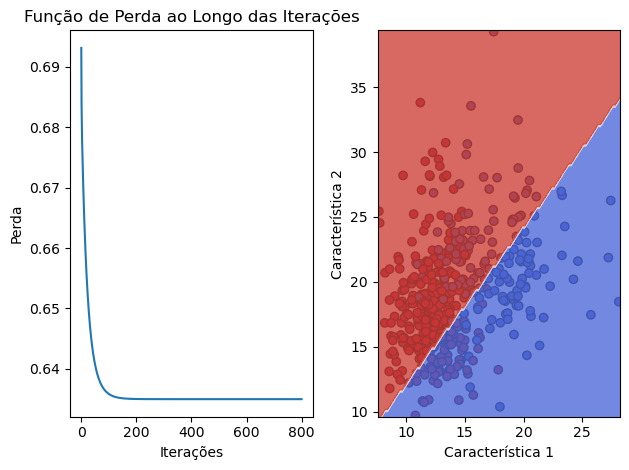

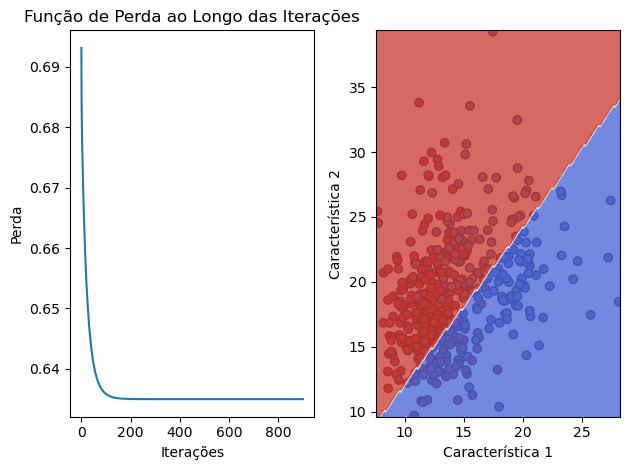

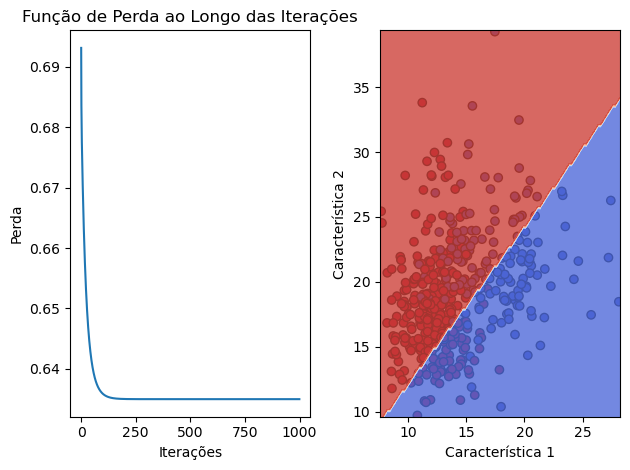

Métricas de Avaliação com 1000 iterações:

 Acurácia: 62.28%
 Precisão: 67.95%


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score


data = datasets.load_breast_cancer()
X = data['data'][:, :2]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

num_iterations = [100, 200, 500, 1000]

for iterations in num_iterations:
    model = LogisticRegression(num_iterations=iterations)
    model.fit(X_train, y_train)

# Prever
    y_pred = model.predict(X_test)

# Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

# Plotar
    model.plot_loss_and_decision_boundary(X_train, y_train)
    print(f"Métricas de Avaliação com {iterations} iterações:\n")
    print(f" Acurácia: {accuracy*100:.2f}%\n Precisão: {precision*100:.2f}%")
